<a href="https://colab.research.google.com/github/salonijaitly/NLP_Sem_VI/blob/main/SPAM_HAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import nltk
import re
import random
import string
from string import punctuation
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer 
from nltk.corpus import twitter_samples 
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
messages = pd.read_csv('/content/spam.csv' , encoding='latin-1')

In [5]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
messages = messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.shape

(5572, 2)

In [8]:
messages.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
def preprocess(words):
    stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
    stemmer = LancasterStemmer()
    
    final_corpus = []
    for i in range(len(words)):
        word = word_tokenize(words[i].lower())
        word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
        j = " ".join(word)
        final_corpus.append(j)
    return final_corpus

In [10]:
def remove_noise(tweet_tokens, stop_words = ()):
    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [11]:
x = messages.v2.tolist()
x = preprocess(remove_noise(x, stopwords.words('english')))
data_new = pd.DataFrame({'data' : x, 'label' : messages.v1})
data_new.label = data_new.label.replace(['ham', 'spam'], [0, 1])
data_new.head()

,data,label
0,go jurong point crazy.. avail bug n gre world ...,0
1,ok lar ... jok wif u on ...,0
2,fre entry 2 wkly comp win fa cup fin tkts 21st...,1
3,u dun say ear hor ... u c already say ...,0
4,nah n't think goe usf liv around though,0


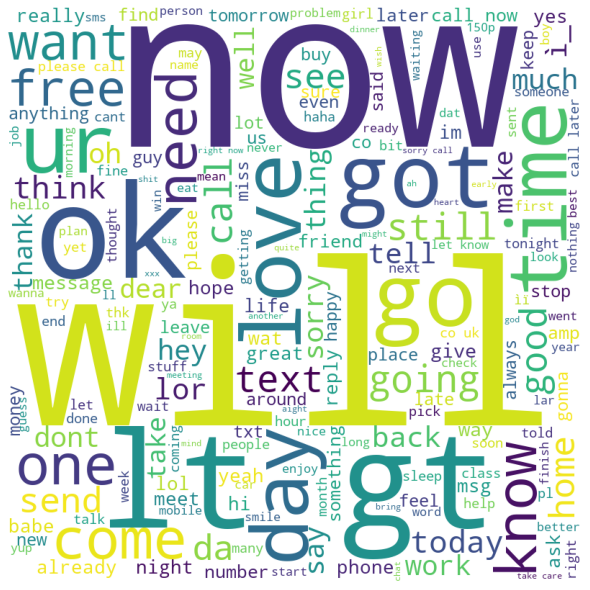

In [12]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in messages.v2: 
       
    val = str(val) 
   
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data_new['data']).toarray() 
y = data_new.label
x.shape

(5572, 6963)

In [14]:
rus = RandomUnderSampler()
x, y = rus.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1195, 6963) (299, 6963)
(1195,) (299,)


Multinomial NB

In [21]:
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()
ab.fit(x_train,y_train)
ytestpred = ab.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ytestpred))
print(confusion_matrix(y_test,ytestpred))
print(classification_report(y_test,ytestpred))

0.9364548494983278
[[144   5]
 [ 14 136]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       149
           1       0.96      0.91      0.93       150

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

ytestpred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ytestpred))
print(confusion_matrix(y_test,ytestpred))
print(classification_report(y_test,ytestpred))

0.919732441471572
[[137  12]
 [ 12 138]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       149
           1       0.92      0.92      0.92       150

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



Random Forest

In [19]:

from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)
ytestpred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ytestpred))
print(confusion_matrix(y_test,ytestpred))
print(classification_report(y_test,ytestpred))

0.9431438127090301
[[148   1]
 [ 16 134]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       149
           1       0.99      0.89      0.94       150

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299

